In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [2]:
# Load the dataset
data_path = '0388.HK.csv'
data = pd.read_csv(data_path, index_col=['Date'], parse_dates=['Date'])
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-25,462.000000,477.399994,461.000000,473.600006,463.301483,5614706
2021-06-28,474.399994,476.600006,471.000000,473.799988,463.497131,1985816
2021-06-29,479.000000,479.000000,467.000000,468.600006,458.410217,3375888
2021-06-30,467.399994,470.000000,461.000000,462.799988,452.736328,2364401
2021-07-02,462.200012,463.799988,454.399994,455.799988,445.888519,5813291


In [8]:
# Moving average
def plot_moving_average(series, _window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=_window).mean()
    
    plt.figure(figsize=(16,8))
    plt.title('Moving average\n window size = {}'.format(_window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[_window:], rolling_mean[_window:])
        deviation = np.std(series[_window:] - rolling_mean[_window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[_window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

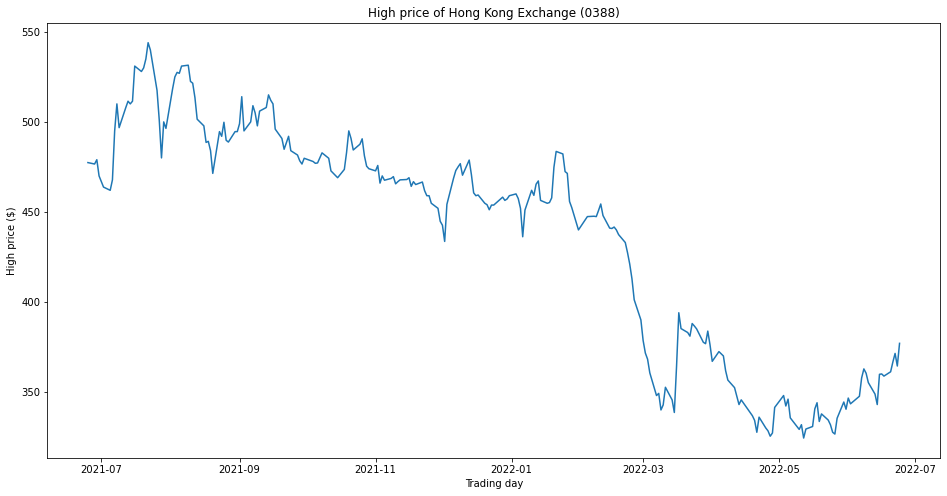

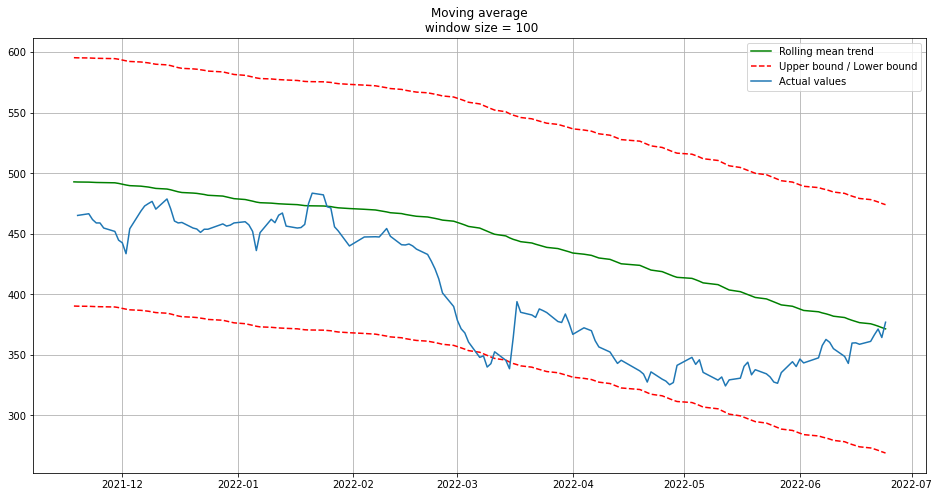

In [9]:
# Exploratory data analysis (EDA)
plt.figure(figsize=(16, 8))
plt.plot(data.High)
plt.title('High price of Hong Kong Exchange (0388)')
plt.ylabel('High price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()
# Smooth by previous 100 days
plot_moving_average(data.High, 100, plot_intervals=True)

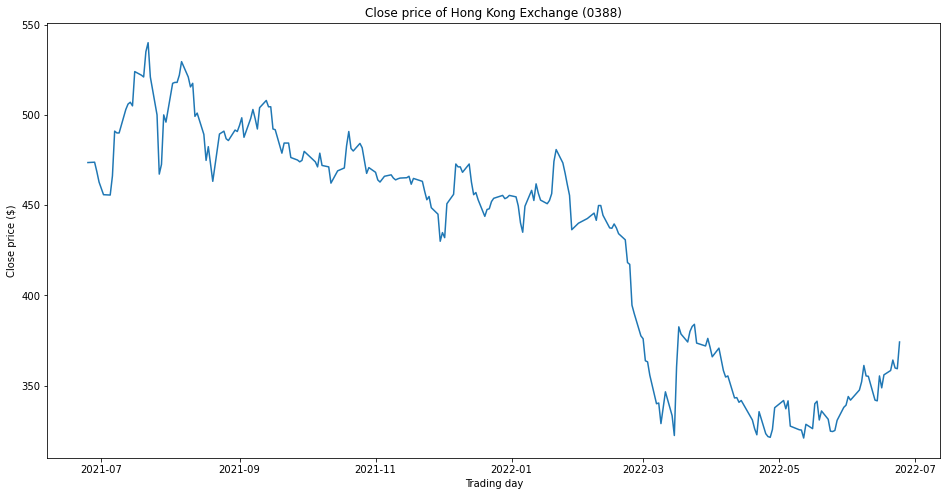

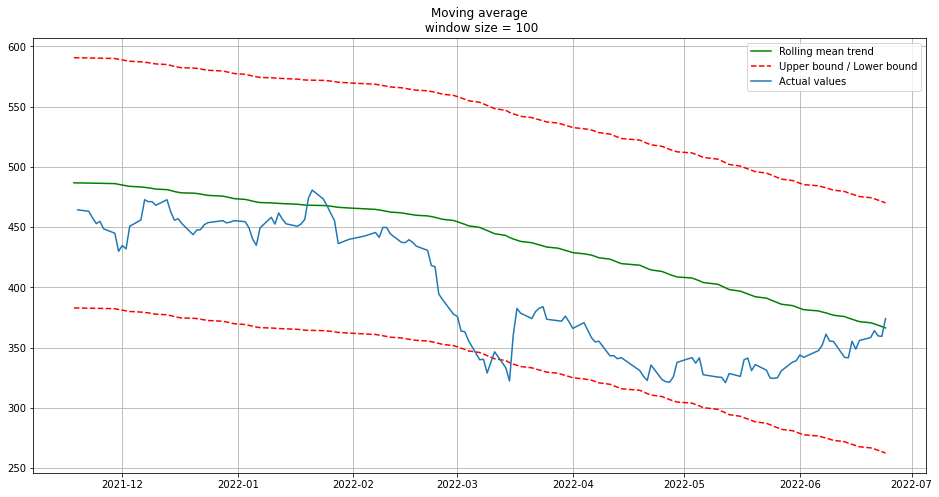

In [13]:
# Exploratory data analysis (EDA)
plt.figure(figsize=(16, 8))
plt.plot(data.Close)
plt.title('Close price of Hong Kong Exchange (0388)')
plt.ylabel('Close price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()
# Smooth by previous 100 days
plot_moving_average(data.Close, 100, plot_intervals=True)